# Water Quality Analysis and Classification

## Context

Water quality is a critical factor in maintaining public health and environmental sustainability. Contaminants in water, such as heavy metals, bacteria, and chemicals, can pose serious health risks if present in unsafe concentrations. This project focuses on analyzing and classifying the quality of water samples from an urban environment to determine their safety for consumption. By examining various water quality parameters, we can identify potential hazards and ensure that the water meets safety standards for human use.

This project focuses on analyzing and classifying water quality in an urban environment using an imaginary dataset. The dataset is designed for educational purposes, allowing users to practice and acquire knowledge in data analysis and machine learning.

## Source

This data set is available on Kaggle in the following link:

> https://www.kaggle.com/datasets/mssmartypants/water-quality

### Data Dictionary

The dataset contains various attributes related to water quality, where each attribute represents a specific water ingredient. The attributes are all numeric variables and are listed below along with their safety thresholds:

- **aluminium**: It is the aluminium content present in water sample. It contaons numeric data. Dangerous if greater than 2.8
- **ammonia**: It is the amonia content present in water sample. It contaons numeric data. Dangerous if greater than 32.5
- **arsenic**: It is the arsenic content present in water sample. It contaons numeric data. Dangerous if greater than 0.01
- **barium**: It is the barium content present in water sample. It contaons numeric data. Dangerous if greater than 2
- **cadmium**: It is the cadmium content present in water sample. It contaons numeric data. Dangerous if greater than 0.005
- **chloramine**: It is the chloramine content present in water sample. It contaons numeric data. Dangerous if greater than 4
- **chromium**: It is the chromium content present in water sample. It contaons numeric data. Dangerous if greater than 0.1
- **copper**: It is the copper content present in water sample. It contaons numeric data. Dangerous if greater than 1.3
- **flouride**: It is the flouride content present in water sample. It contaons numeric data. Dangerous if greater than 1.5
- **bacteria**: It is the different bacteria present in water sample. It contaons numeric data. Dangerous if greater than 0
- **viruses**: It is the different viruses present in water sample. It contaons numeric data. Dangerous if greater than 0
- **lead**: It is the lead content present in water sample. It contaons numeric data. Dangerous if greater than 0.015
- **nitrates**: It is the nitrate content present in water sample. It contaons numeric data. Dangerous if greater than 10
- **nitrites**: It is the nitrites content present in water sample. It contaons numeric data. Dangerous if greater than 1
- **mercury**: It is the mercury content present in water sample. It contaons numeric data. Dangerous if greater than 0.002
- **perchlorate**: It is the perchlorate content present in water sample. It contaons numeric data. Dangerous if greater than 56
- **radium**: It is the radium content present in water sample. It contaons numeric data. Dangerous if greater than 5
- **selenium**: It is the selenium content present in water sample. It contaons numeric data. Dangerous if greater than 0.5
- **silver**: It is the silder content present in water sample. It contaons numeric data. Dangerous if greater than 0.1
- **uranium**: It is the uranium content present in water sample. It contaons numeric data. Dangerous if greater than 0.3
- **is_safe**: It is the output feature the clasify the quality of the water whether it is safe or not. It contains two attributes (**0 - not safe, 1 - safe**)

### Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, uncover the patterns and relatonship among the features that helps in analysis of water and classify whether it is safe or not.
2. **Data Cleaning**: Cleaning the data means to remove or handle missing values and outliers properly and remove unnecessary features.


### Load Libraries

In [24]:
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.ensemble import IsolationForest

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Plot Style
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "water_quality.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### General Information

In [4]:
# Show 1st 5 rows to get an idea about the data present in each feature
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 7999
Number of features: 21


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)

FEATURE DESCRIPTION
aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object
------------------------------------------------------------


### Key Findings

- All observations are numeric. Exceptions are **ammonia and is_safe**. Both of them are of **object** type but they contains numeric data. So they needs to be converted to **numeric**.

In [7]:
# Convert the type of data for those two.
# non_num = df.loc[pd.to_numeric(df["ammonia"], errors="coerce").isna(), "ammonia"]
# non_num
df["ammonia"] = pd.to_numeric(df["ammonia"], errors="coerce")
df["is_safe"] = pd.to_numeric(df["is_safe"], errors="coerce")


In [8]:
# Missing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("None of the features have any missing or null value")

MISSING VALUE DETECTION
aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64


In [9]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Univariate Analysis

In [10]:
# Statistical Information of features
print("=" * 60)
print("STATISTICAL INFORMATION")
print("=" * 60)
for col in df.columns:
    if col != "is_safe":
        print(f"Feature: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")
        print(f"Range: {df[col].min()} - {df[col].max()}")
        print("-" * 60)

STATISTICAL INFORMATION
Feature: aluminium
Mean: 0.6661582697837232
Median: 0.07
Standard Deviation: 1.2651452203447164
Range: 0.0 - 5.05
------------------------------------------------------------
Feature: ammonia
Mean: 14.2782116058029
Median: 14.13
Standard Deviation: 8.878930182121179
Range: -0.08 - 29.84
------------------------------------------------------------
Feature: arsenic
Mean: 0.16144518064758093
Median: 0.05
Standard Deviation: 0.2525904534978835
Range: 0.0 - 1.05
------------------------------------------------------------
Feature: barium
Mean: 1.5677147143392924
Median: 1.19
Standard Deviation: 1.2160912065210814
Range: 0.0 - 4.94
------------------------------------------------------------
Feature: cadmium
Mean: 0.042806100762595334
Median: 0.04
Standard Deviation: 0.03604940599654153
Range: 0.0 - 0.13
------------------------------------------------------------
Feature: chloramine
Mean: 2.1768308538567323
Median: 0.53
Standard Deviation: 2.5670274010395553
Range: 0

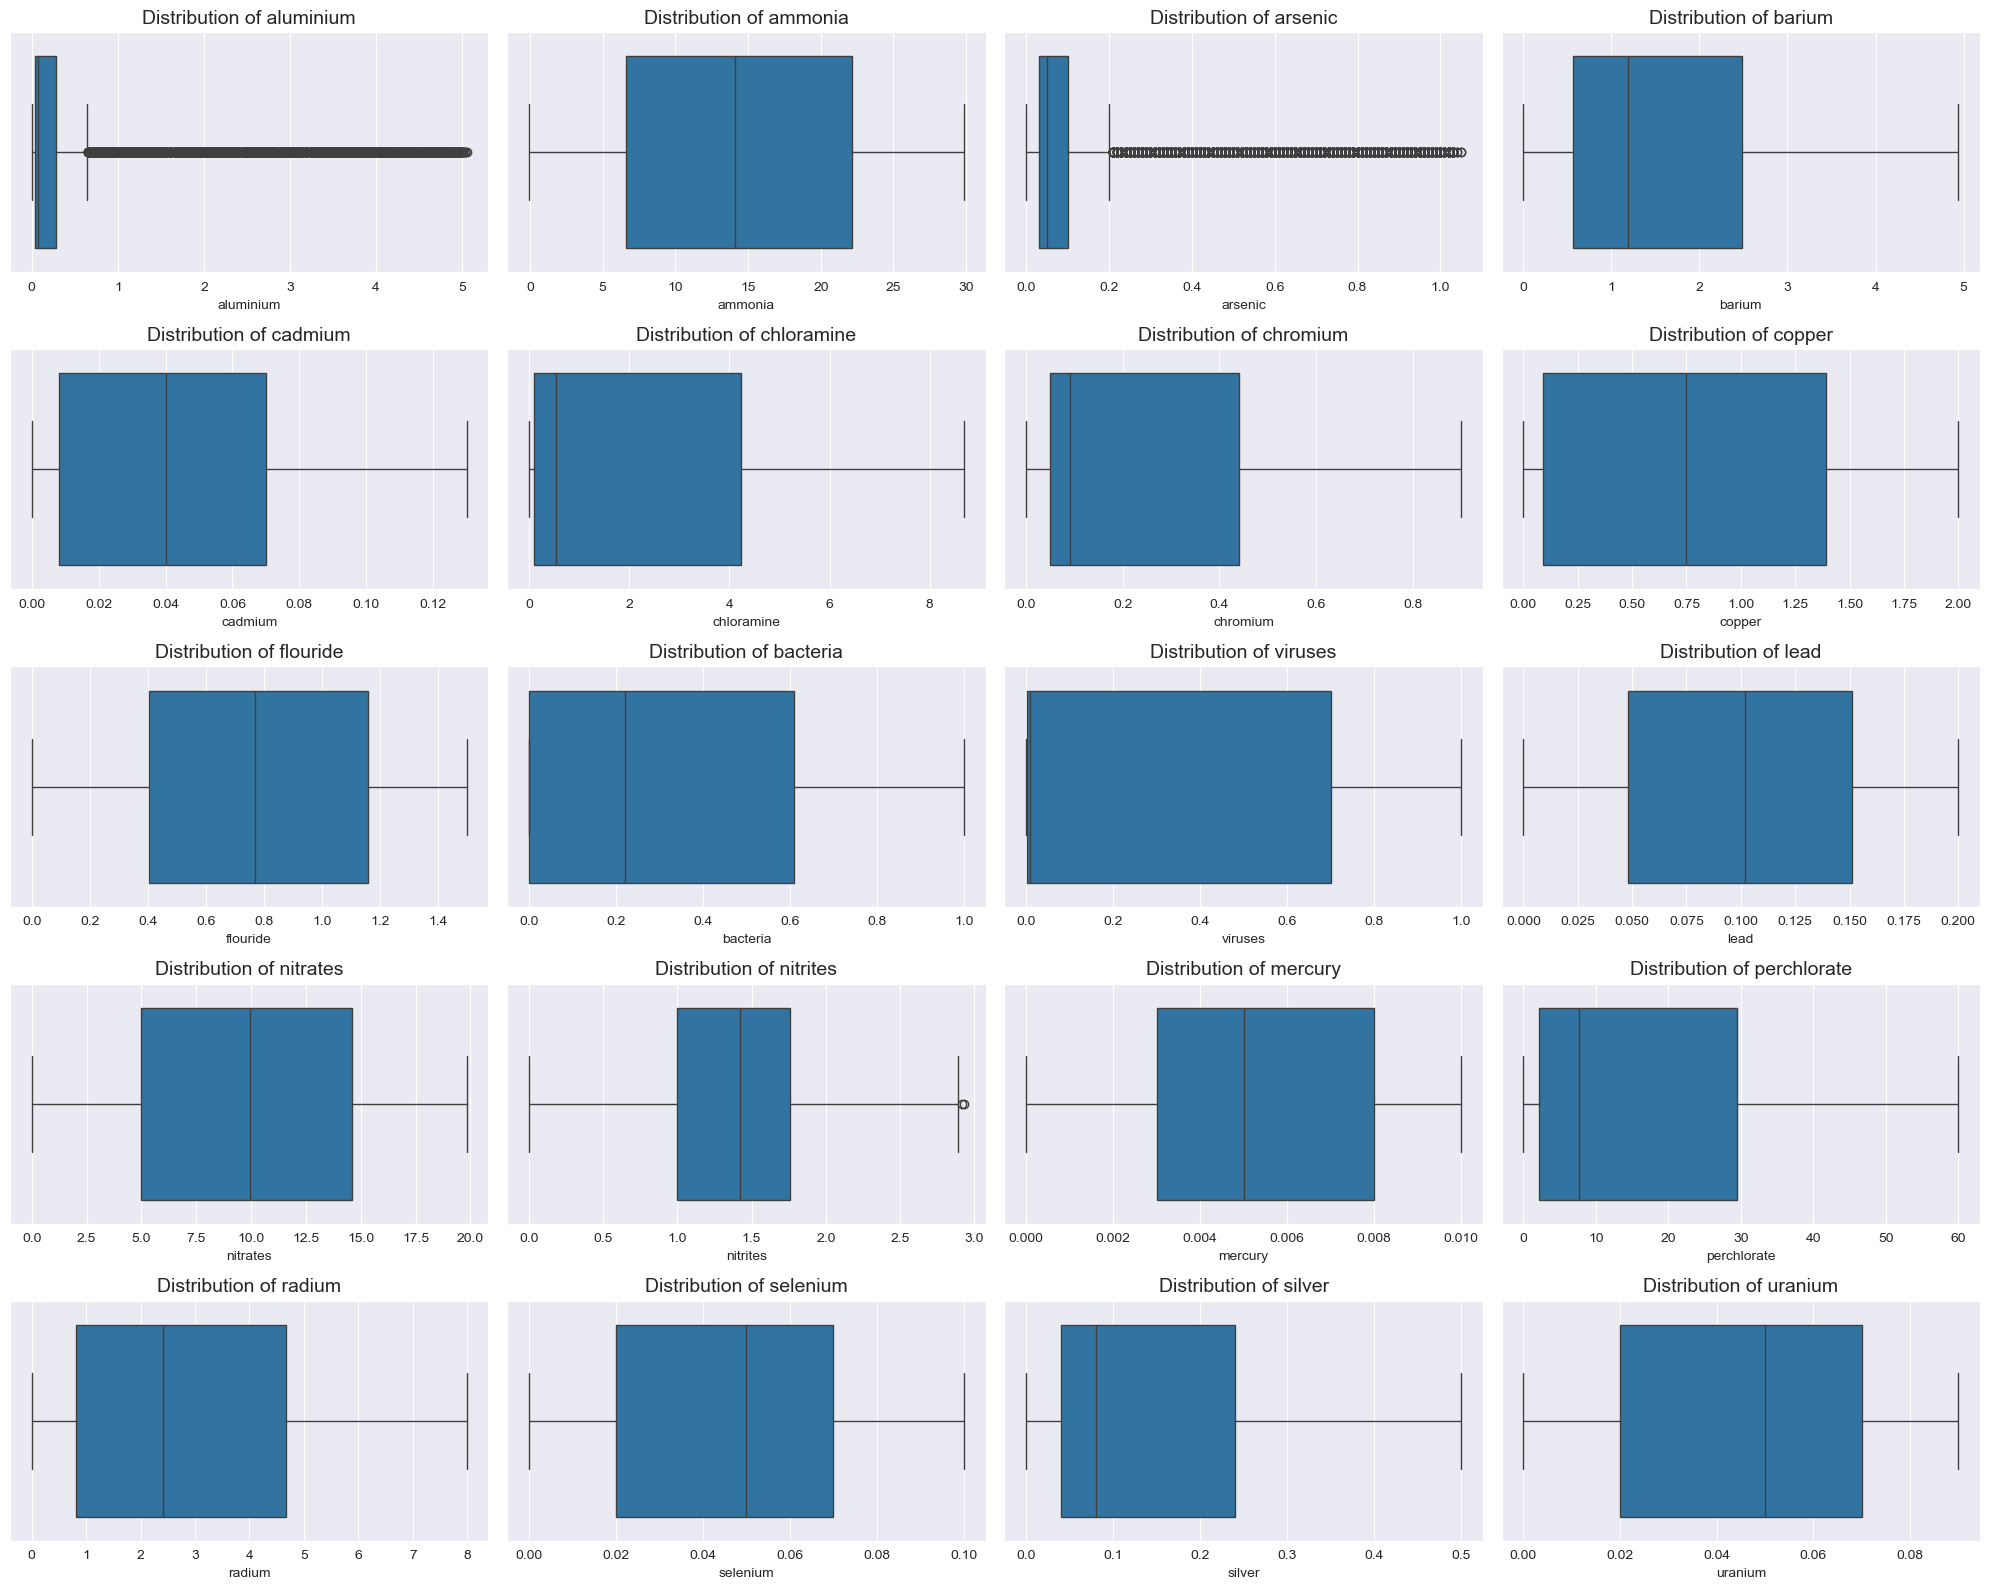

In [11]:
# Outlier Detection using Box Plot
fig, axes = plt.subplots(nrows=5, ncols= 4, figsize=(20, 16))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    if col != "is_safe":
        sns.boxplot(data= df, x = col, ax= axes[i])
        axes[i].set_title(f"Distribution of {col}", fontsize=14)
plt.tight_layout()
plt.show()

### Key Findings

From Boxplot Analysis it is found that **aluminium** and **arsenic** have many outliers above upper extreme, and **nitrites** has a very few outliers.

### Correlation Analysis

In [12]:
# Find linear correlation among the features with Pearson's correlation
corr = df.corr().round(2)
corr

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.00,0.07,0.23,0.29,-0.10,0.37,0.35,0.17,-0.01,-0.08,...,0.02,-0.00,0.24,-0.00,0.36,0.24,-0.00,0.33,0.01,0.33
ammonia,0.07,1.00,0.05,0.07,-0.01,0.10,0.12,0.02,-0.03,0.06,...,-0.04,0.01,-0.06,0.02,0.09,0.05,0.03,0.08,0.01,-0.02
arsenic,0.23,0.05,1.00,0.36,0.33,0.36,0.31,-0.04,0.00,0.04,...,-0.09,0.03,0.31,-0.02,0.33,0.22,-0.01,0.31,0.00,-0.12
barium,0.29,0.07,0.36,1.00,-0.04,0.45,0.42,0.07,-0.02,0.10,...,-0.04,-0.01,0.31,0.01,0.46,0.29,0.04,0.43,-0.00,0.09
cadmium,-0.10,-0.01,0.33,-0.04,1.00,-0.14,-0.16,-0.11,0.00,-0.09,...,-0.03,0.02,-0.02,-0.02,-0.15,-0.10,0.01,-0.16,-0.01,-0.26
chloramine,0.37,0.10,0.36,0.45,-0.14,1.00,0.56,0.12,0.00,0.15,...,-0.03,-0.00,0.38,-0.02,0.59,0.39,0.01,0.52,-0.01,0.19
chromium,0.35,0.12,0.31,0.42,-0.16,0.56,1.00,0.11,-0.00,0.14,...,-0.05,-0.01,0.34,-0.02,0.52,0.32,0.03,0.51,-0.01,0.18
copper,0.17,0.02,-0.04,0.07,-0.11,0.12,0.11,1.00,0.01,0.15,...,0.12,0.00,0.16,0.02,0.10,0.03,-0.00,0.09,0.01,0.03
flouride,-0.01,-0.03,0.00,-0.02,0.00,0.00,-0.00,0.01,1.00,0.01,...,0.01,-0.01,-0.02,-0.00,-0.02,0.01,0.02,0.01,0.02,0.01
bacteria,-0.08,0.06,0.04,0.10,-0.09,0.15,0.14,0.15,0.01,1.00,...,-0.03,-0.03,0.25,-0.00,0.15,0.10,-0.01,0.15,0.04,-0.02


<Axes: >

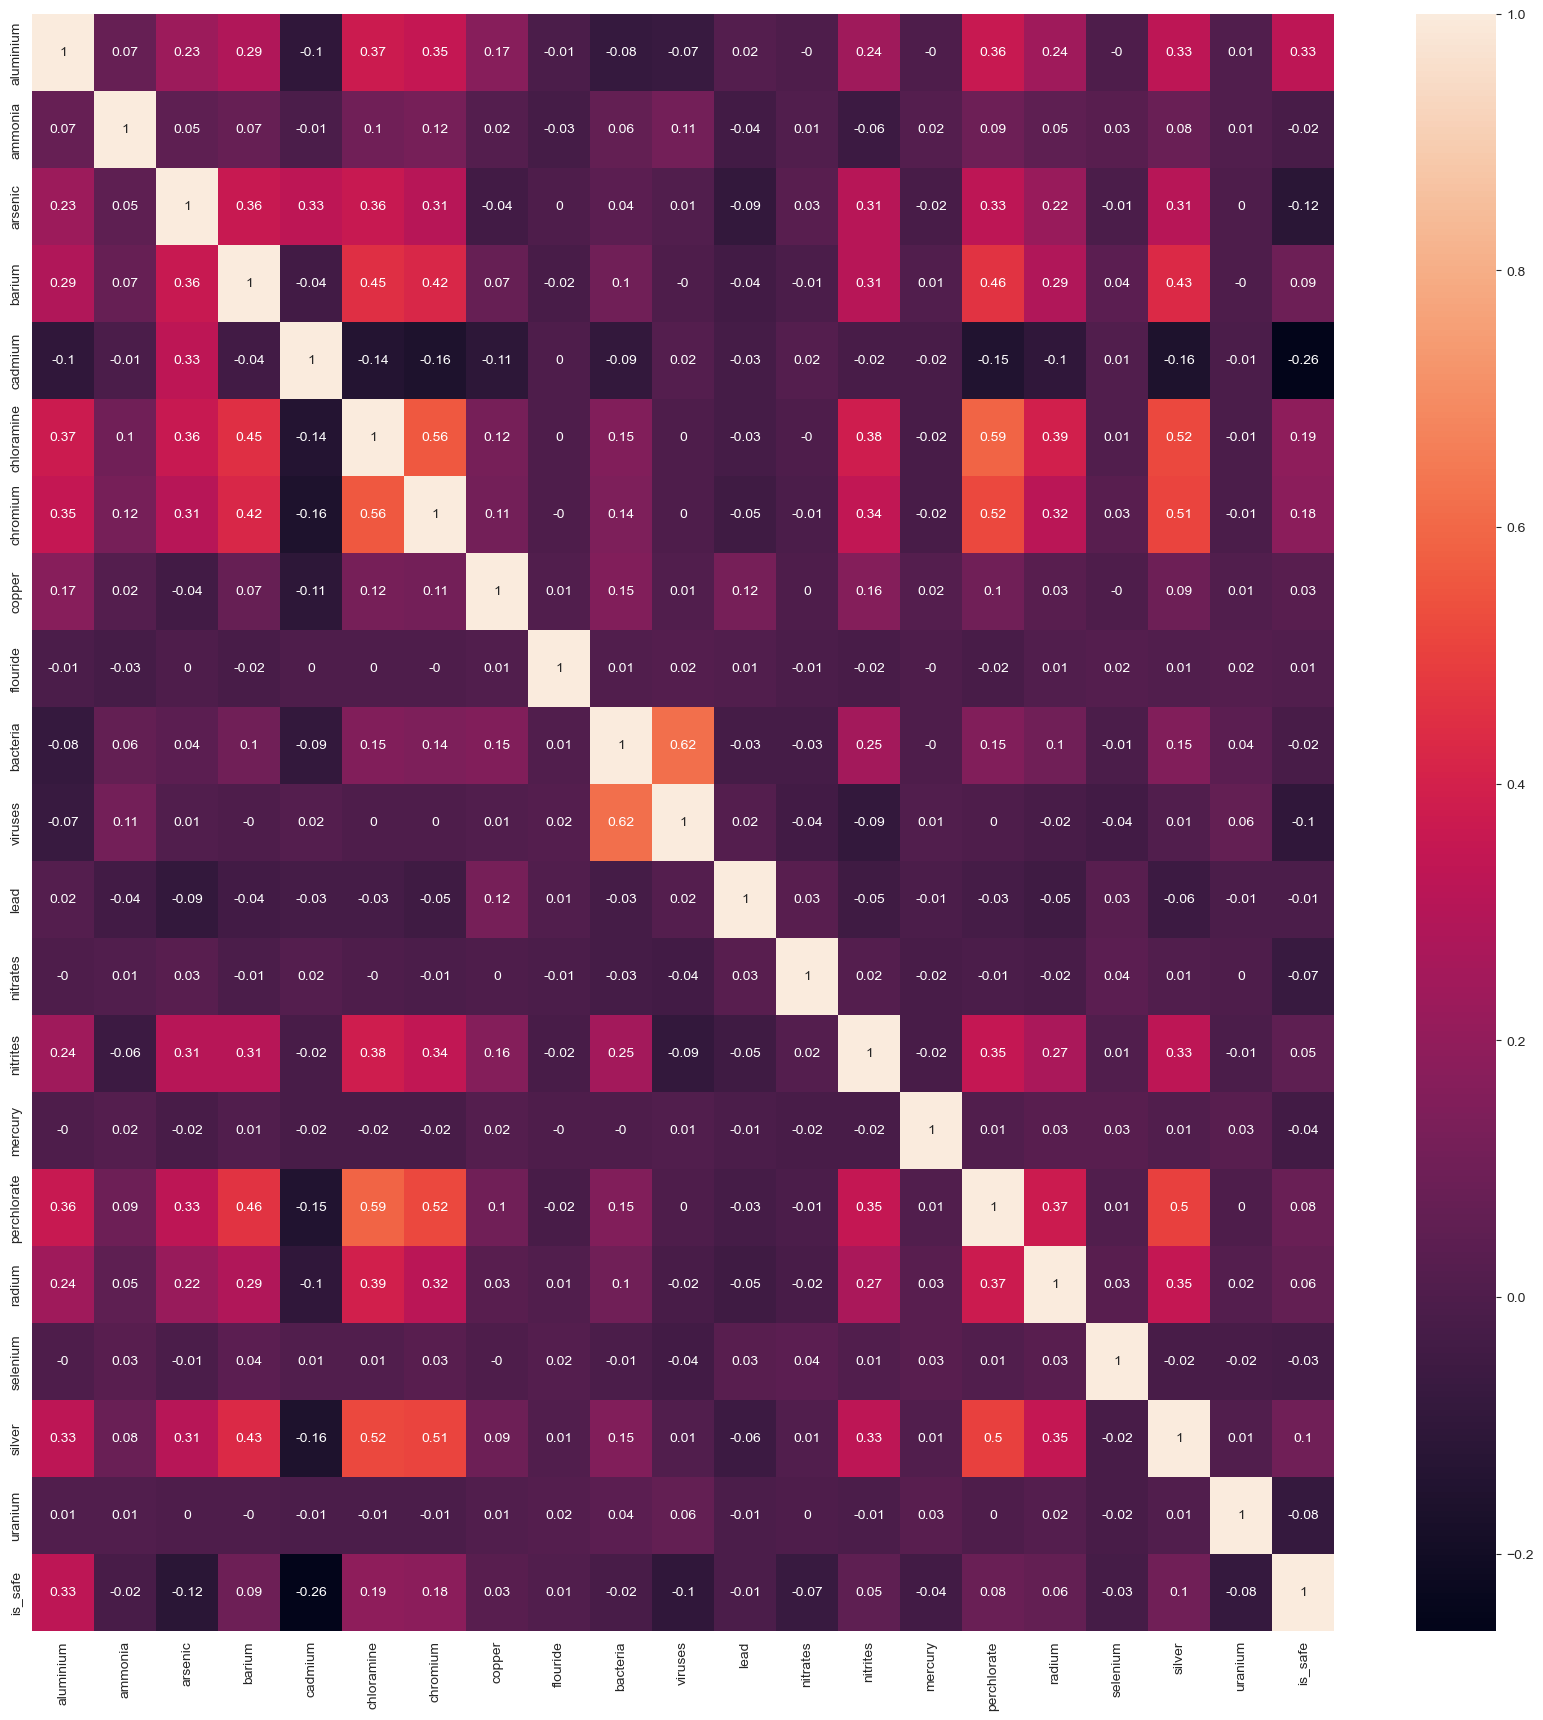

In [13]:
# Visualize correlation wiht heatmap
plt.figure(figsize=(21, 21))
sns.heatmap(corr, annot= True)

In [18]:
# Predictive Power Score analysis to find non linear correlation analysis
pp_matrix = pps.matrix(df)
pp_matrix[(pp_matrix["x"] != pp_matrix["y"]) & (pp_matrix["ppscore"] > 0.2)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
111,chloramine,chromium,0.285381,regression,True,mean absolute error,0.201034,0.143663,DecisionTreeRegressor()
120,chloramine,perchlorate,0.304850,regression,True,mean absolute error,13.662802,9.497696,DecisionTreeRegressor()
123,chloramine,silver,0.203530,regression,True,mean absolute error,0.106438,0.084775,DecisionTreeRegressor()
131,chromium,chloramine,0.353927,regression,True,mean absolute error,2.018520,1.304112,DecisionTreeRegressor()
141,chromium,perchlorate,0.283338,regression,True,mean absolute error,13.662802,9.791615,DecisionTreeRegressor()
144,chromium,silver,0.260236,regression,True,mean absolute error,0.106438,0.078739,DecisionTreeRegressor()
199,bacteria,viruses,0.610223,regression,True,mean absolute error,0.318972,0.124328,DecisionTreeRegressor()
219,viruses,bacteria,0.283128,regression,True,mean absolute error,0.284496,0.203947,DecisionTreeRegressor()
320,perchlorate,chloramine,0.287608,regression,True,mean absolute error,2.018520,1.437978,DecisionTreeRegressor()
383,silver,chloramine,0.268874,regression,True,mean absolute error,2.018520,1.475793,DecisionTreeRegressor()


### Key Findings

1. From Pearson's correlation analysis it is found that all the features have weak linear correlation with target variable is_safe.
2. From Predictive Power Score analysis it is found that all the features have weak non-linear correlation with target variable is_safe.
3. From Pearson's correlation analysis it is also found that some input features have moderate linear correlation among themselves.
4. From Predictive Power Score analysis it is also found that some input features have moderate non-linear correlation among themselves.

### Data Cleaning

In [19]:
df[df["ammonia"].isna() == True]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,NaN,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,NaN
7568,0.06,NaN,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,NaN
7890,0.01,NaN,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,NaN


In [31]:
# As ammonia and is_safe are missing in same rowa and it is only 3 so these rows can be removed.
df_dn = df.dropna()

In [32]:
# Sanity check
df_dn.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [33]:
# After Romoveing missing values now we can check outlier rows in the observations with an ensemble technique Isolation forest.
isof = IsolationForest(contamination= 0.1, random_state= 42)
isof.fit(df_dn)

IsolationForest(contamination=0.1, random_state=42)

In [34]:
# Assign and dectect outlier rows
df_dn["Outlier"] = isof.predict(df_dn)
outliers = df_dn[df_dn["Outlier"] == -1]
df_dn.drop("Outlier", axis=1, inplace= True)
print("=" * 60)
print("OUTLIER ROW DETECTION")
print("=" * 60)
print(f"Number of outlier rows: {outliers.shape[0]}")

OUTLIER ROW DETECTION
Number of outlier rows: 800


In [35]:
# Remove the outlier rows
indexes = list(outliers.index)
df_do= df_dn.drop(indexes)

In [36]:
# Save the dataframe without missing values
dn_path = os.path.join(data_path, "water_wom.csv")
df_dn.to_csv(dn_path, index= False)

In [37]:
# Save without missing and outliers
do_path = os.path.join(data_path, "water_womo.csv")
df_do.to_csv(do_path, index=False)